# BHARAT INTERN

# TASK-1: HOUSE PRICE PREDICTION

In [ ]:
                                                                Name : B saichatura                                          
                                                                Mail : saichaturab3118@gmail.com      

# Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# DATASET

In [4]:
df = pd.read_csv('HouseData.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Identify Numerical and categorical columns

In [6]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


# Encode categorical columns using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Histograms for Numerical columns

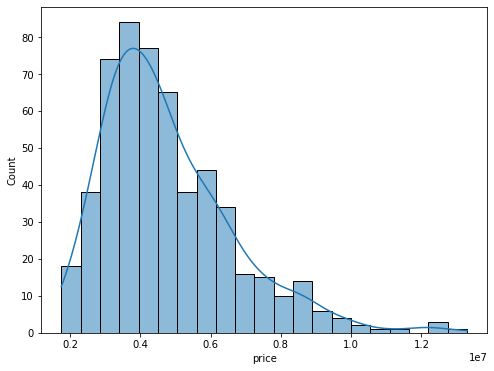

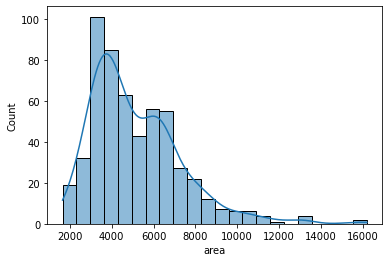

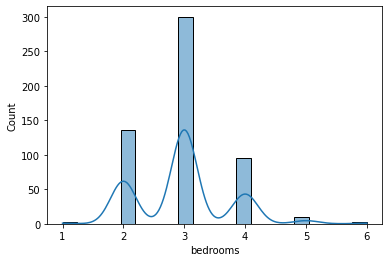

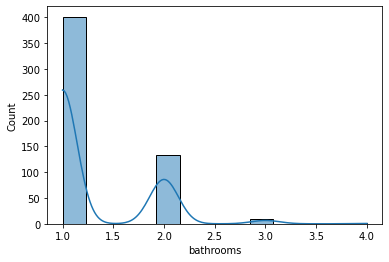

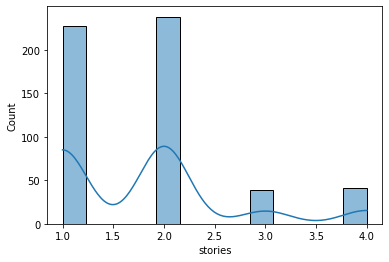

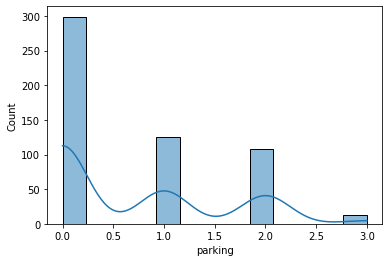

In [8]:
plt.figure(figsize=(8, 6))
for column in num_cols:
    sns.histplot(data=df, x=column, kde=True)
    plt.show()

# Independent and Dependent variables

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Training and Test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Intercept:", model.intercept_)

Intercept: 1.729410322699008


# Predict the test set Results

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1.21687152, 0.95557682, 1.25063093, 0.90712097, 1.3565944 ,
       1.17604798, 0.99463666, 1.0650627 , 1.44700909, 1.44888266,
       0.47822999, 1.36237589, 1.4351342 , 1.25085216, 1.20951353,
       1.58778921, 1.27761963, 0.74926098, 1.09297557, 1.37448958,
       0.80898507, 0.96068318, 1.44082897, 0.82140608, 0.89746509,
       0.17732158, 1.12751054, 0.92517472, 0.41365171, 1.30961097,
       0.79861159, 1.1382687 , 0.88765186, 1.33404276, 1.27032137,
       1.12817841, 0.76106431, 1.07410513, 1.4248696 , 1.40091267,
       0.98030956, 1.22624061, 0.95422852, 1.00433864, 1.35685488,
       1.1008853 , 0.86643363, 0.93060386, 1.39465924, 1.13296572,
       0.54186539, 1.29302086, 1.17662567, 1.18317179, 1.10917753,
       1.62574668, 0.4504872 , 1.35382911, 1.18880442, 1.31848928,
       0.97842358, 1.43322322, 0.92808125, 1.16113652, 1.02229397,
       0.70840016, 0.76180947, 0.88663036, 0.86568149, 0.65662952,
       1.31440607, 1.02609505, 1.24022492, 0.90292442, 1.18317

# Differences between Actual and Predicted values

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

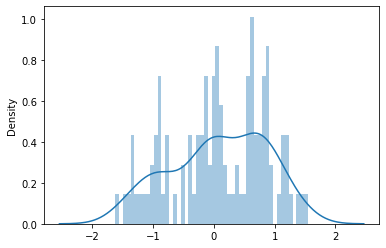

In [15]:
sns.distplot((y_test-y_pred), bins=50)

# Evaluate the model

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)
print('Mean absolute error:', mae)

Root Mean Squared Error: 0.7823904562382503
R^2 Score: 0.02848331981607577
Mean absolute error: 0.6528965180210893


# Correlation Matrix

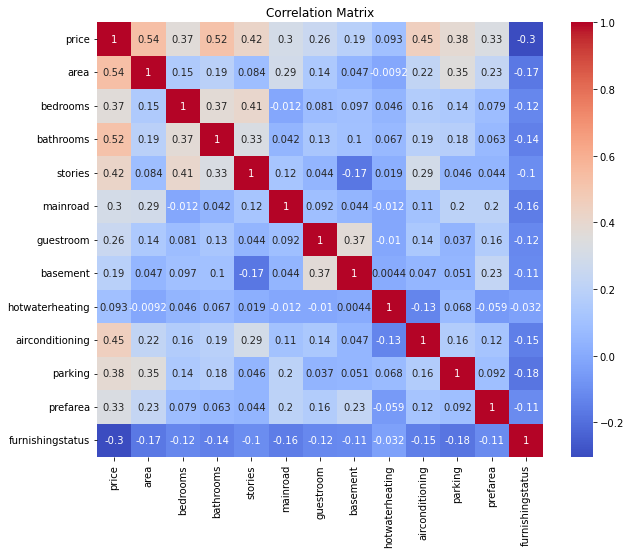

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()